📂 Please upload your image dataset (ZIP file)...


Saving archive (8).zip to archive (8).zip
✅ Dataset extracted to: /content/object_dataset
102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Pretrained ResNet50 model loaded (ImageNet classes).
📸 Found 666 images in your dataset.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


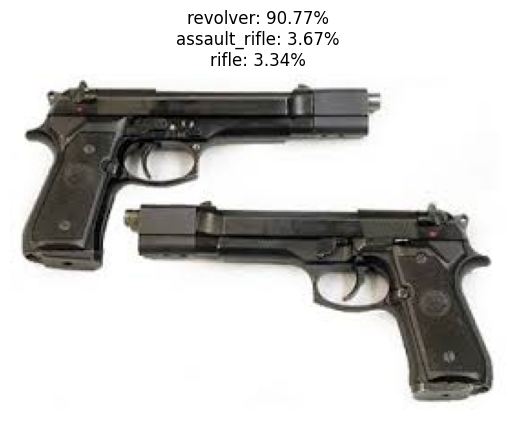

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


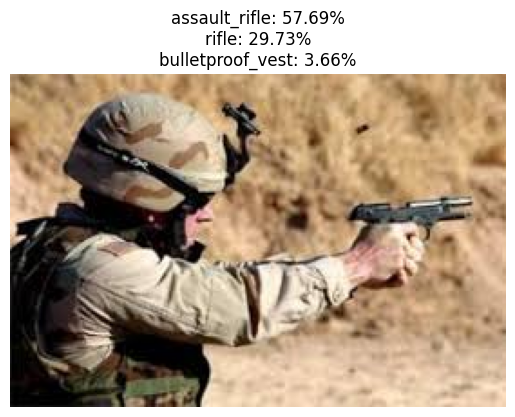

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


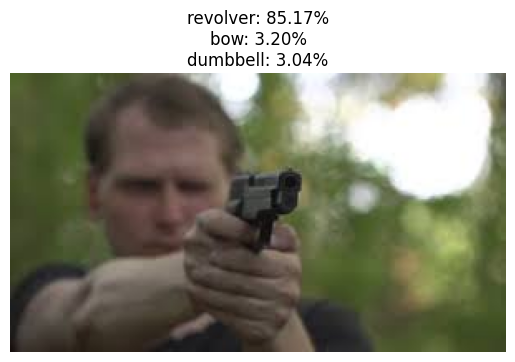

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


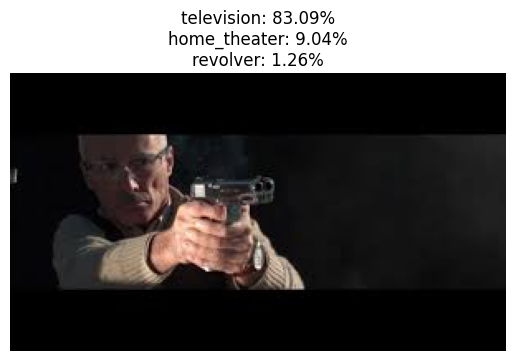

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


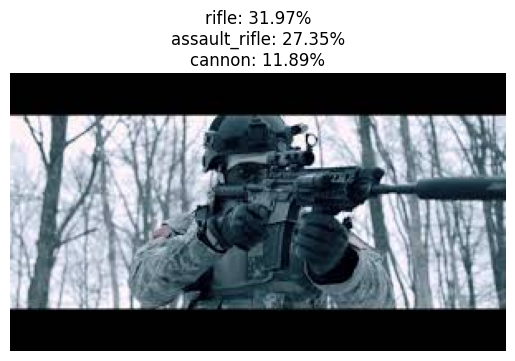

✅ Object recognition completed on sample images.


In [ ]:
# ================================================
# 🧠 OBJECT RECOGNITION USING PRETRAINED RESNET50
# ================================================

import os, zipfile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from google.colab import files

# ================================================
# 1️⃣ Upload Dataset (ZIP file)
# ================================================
print("📂 Please upload your image dataset (ZIP file)...")
uploaded = files.upload()

# Extract ZIP
for fn in uploaded.keys():
    zip_filename = fn

extract_path = "/content/object_dataset"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Dataset extracted to: {extract_path}")

# ================================================
# 2️⃣ Load Pretrained Model (ResNet50)
# ================================================
model = ResNet50(weights="imagenet")
print("✅ Pretrained ResNet50 model loaded (ImageNet classes).")

# ================================================
# 3️⃣ Collect Image Paths
# ================================================
valid_ext = [".jpg", ".jpeg", ".png"]
image_paths = [
    os.path.join(root, file)
    for root, _, files in os.walk(extract_path)
    for file in files
    if os.path.splitext(file)[1].lower() in valid_ext
]

print(f"📸 Found {len(image_paths)} images in your dataset.")

# ================================================
# 4️⃣ Predict Objects in Sample Images
# ================================================
for i, img_path in enumerate(image_paths[:5]):  # Show first 5 images
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        preds = model.predict(x)
        decoded = decode_predictions(preds, top=3)[0]

        # Display results
        plt.imshow(Image.open(img_path))
        plt.axis('off')
        title = "\n".join([f"{name}: {prob*100:.2f}%" for (_, name, prob) in decoded])
        plt.title(title)
        plt.show()
    except Exception as e:
        print(f"⚠️ Error reading {img_path}: {e}")

print("✅ Object recognition completed on sample images.")
